<a href="https://colab.research.google.com/github/het-khatusuriya/ML/blob/main/d22ce166_CNN_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neural Network practical with MNIST dataset

In [ ]:
from keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


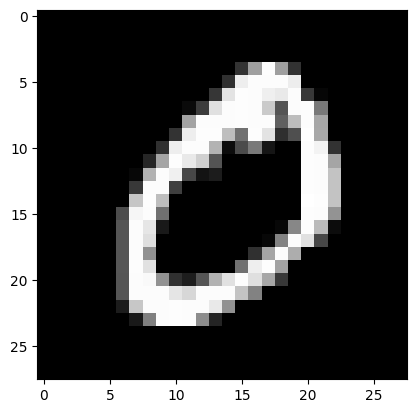

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1,:,:].reshape(28,28),cmap='gray')
plt.show()

In [ ]:
y_train[1]

0

In [ ]:
#Convert labels in one hot vector
from keras.utils import to_categorical
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [ ]:
y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
# Normalize the images. #Mean centering = > It helps in reducing the likelihood of vanishing gradients during training and can improve the convergence of the network.
x_train_norm = (x_train / 255) - 0.5
x_test_norm = (x_test / 255) - 0.5

In [ ]:
print(x_train_norm.shape)
print(x_train[1,1,1],x_train_norm[1,1,1])


(60000, 28, 28)
0 -0.5


In [ ]:
x_train_norm.shape[0]

60000

In [ ]:
# Flatten the images.
#x_train_images = x_train_norm.reshape((-1, 784))
#x_test_images = x_test_norm.reshape((-1, 784))


# reshape dataset to have a single channel
x_train_images = x_train_norm.reshape((x_train_norm.shape[0], 28, 28, 1))
x_test_images = x_test_norm.reshape((x_test_norm.shape[0], 28, 28, 1))


In [ ]:
print(x_train_images.shape)
print(y_train_encoded.shape)
print(x_test_images.shape)
print(y_test_encoded.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [ ]:
#'he_uniform' stands for Kaiming He, a researcher known for his contributions to deep learning. =>the weights are initialized from a uniform distribution.
# he Initialization is designed to work well with activation functions like ReLU (Rectified Linear Unit),
#which is commonly used in modern neural networks.
#It helps in addressing the vanishing gradient problem associated with ReLU.

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2 )))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [ ]:
# compile model
from keras.optimizers import SGD
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 100)               1

In [ ]:
# Training a model on Train data and at the end it will updates the weights.
eval = model.fit(x_train_images, y_train_encoded, epochs=10, batch_size=32)

Epoch 1/10


 369/1875 [====>.........................] - ETA: 25s - loss: 0.3918 - accuracy: 0.8750

In [ ]:
# Evaluate the model
scores = model.evaluate(x_test_images, y_test_encoded)
print("\nAccuracy: %.2f%%" % (scores[1]*100))

313/313 [==============================] - 6s 17ms/step - loss: 0.0369 - accuracy: 0.9902

Accuracy: 99.02%
